# Capstone

---
### Problem Statement:

**Which players are predicted to be future talents after 2017?**

---

### Goal:

- Clustering using rankings and results to group players into performance groups
- Use stats of players to group them into clusters to predict performance


### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/Users/aidandominguez/opt/anaconda3/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Read in data

In [2]:
df_scores = pd.read_csv('./datasets/match_scores_2017_unindexed_csv.csv')
df_stats = pd.read_csv('./datasets/match_stats_2017_unindexed_csv.csv')

In [3]:
print(df_scores.columns)
df_scores.head(2)

Index(['tourney_year_id', 'tourney_order', 'tourney_slug',
       'tourney_url_suffix', 'tourney_round_name', 'round_order',
       'match_order', 'winner_name', 'winner_player_id', 'winner_slug',
       'loser_name', 'loser_player_id', 'loser_slug', 'winner_seed',
       'loser_seed', 'match_score_tiebreaks', 'winner_sets_won',
       'loser_sets_won', 'winner_games_won', 'loser_games_won',
       'winner_tiebreaks_won', 'loser_tiebreaks_won', 'match_id',
       'match_stats_url_suffix'],
      dtype='object')


,tourney_year_id,tourney_order,tourney_slug,tourney_url_suffix,tourney_round_name,round_order,match_order,winner_name,winner_player_id,winner_slug,...,loser_seed,match_score_tiebreaks,winner_sets_won,loser_sets_won,winner_games_won,loser_games_won,winner_tiebreaks_won,loser_tiebreaks_won,match_id,match_stats_url_suffix
0,2017-339,1,brisbane,/en/scores/archive/brisbane/339/2017/results,Finals,1,1,Grigor Dimitrov,d875,grigor-dimitrov,...,3,62 26 63,2,1,14,11,0,0,2017-339-d875-n552,/en/scores/2017/339/MS001/match-stats
1,2017-339,1,brisbane,/en/scores/archive/brisbane/339/2017/results,Semi-Finals,2,1,Grigor Dimitrov,d875,grigor-dimitrov,...,1,76(7) 62,2,0,13,8,1,0,2017-339-d875-r975,/en/scores/2017/339/MS002/match-stats


In [4]:
print(df_stats.columns)
df_stats.head(2)

Index(['tourney_order', 'match_id', 'match_stats_url_suffix', 'match_time',
       'match_duration', 'winner_aces', 'winner_double_faults',
       'winner_first_serves_in', 'winner_first_serves_total',
       'winner_first_serve_points_won', 'winner_first_serve_points_total',
       'winner_second_serve_points_won', 'winner_second_serve_points_total',
       'winner_break_points_saved', 'winner_break_points_serve_total',
       'winner_service_points_won', 'winner_service_points_total',
       'winner_first_serve_return_won', 'winner_first_serve_return_total',
       'winner_second_serve_return_won', 'winner_second_serve_return_total',
       'winner_break_points_converted', 'winner_break_points_return_total',
       'winner_service_games_played', 'winner_return_games_played',
       'winner_return_points_won', 'winner_return_points_total',
       'winner_total_points_won', 'winner_total_points_total', 'loser_aces',
       'loser_double_faults', 'loser_first_serves_in',
       'loser_f

,tourney_order,match_id,match_stats_url_suffix,match_time,match_duration,winner_aces,winner_double_faults,winner_first_serves_in,winner_first_serves_total,winner_first_serve_points_won,...,loser_second_serve_return_won,loser_second_serve_return_total,loser_break_points_converted,loser_break_points_return_total,loser_service_games_played,loser_return_games_played,loser_return_points_won,loser_return_points_total,loser_total_points_won,loser_total_points_total
0,0,2017-339-r975-n409,/en/scores/2017/339/MS004/match-stats,02:21:00,141,23,3,62,97,50,...,19,35,1,7,14,15,31,97,84,181
1,0,2017-339-d875-n552,/en/scores/2017/339/MS001/match-stats,01:49:00,109,7,2,52,77,41,...,13,25,2,7,12,13,24,77,69,146


In [5]:
# look for columns with null values and drop

df_scores.drop(columns = 'match_stats_url_suffix', inplace = True) # can I filter by columsn that have missing values?

### EDA

In [6]:
# Look at 1st serve and 2nd serve percentages
df_stats.dtypes

tourney_order                        int64
match_id                            object
match_stats_url_suffix              object
match_time                          object
match_duration                       int64
winner_aces                          int64
winner_double_faults                 int64
winner_first_serves_in               int64
winner_first_serves_total            int64
winner_first_serve_points_won        int64
winner_first_serve_points_total      int64
winner_second_serve_points_won       int64
winner_second_serve_points_total     int64
winner_break_points_saved            int64
winner_break_points_serve_total      int64
winner_service_points_won            int64
winner_service_points_total          int64
winner_first_serve_return_won        int64
winner_first_serve_return_total      int64
winner_second_serve_return_won       int64
winner_second_serve_return_total     int64
winner_break_points_converted        int64
winner_break_points_return_total     int64
winner_serv

---
#### Winner vs Loser stats

In [7]:
# first serve percentage
avg_first_serve_in_win = (df_stats['winner_first_serves_in'] / df_stats['winner_first_serves_total']).mean()
avg_first_serve_in_lose = (df_stats['loser_first_serves_in'] / df_stats['loser_first_serves_total']).mean()

# first serve points won (percentage)
avg_first_serve_points_win = (df_stats['winner_first_serve_points_won'] / df_stats['winner_first_serve_points_total']).mean()
avg_first_serve_points_lose = (df_stats['loser_first_serve_points_won'] / df_stats['loser_first_serve_points_total']).mean()

# second serve points won (pecentage)
avg_second_serve_points_win = (df_stats['winner_second_serve_points_won'] / df_stats['winner_second_serve_points_total']).mean()
avg_second_serve_points_lose = (df_stats['loser_second_serve_points_won'] / df_stats['loser_second_serve_points_total']).mean()

# first serve return points won (percentage)
avg_first_return_points_win = (df_stats['winner_first_serve_return_won'] / df_stats['winner_first_serve_return_total']).mean()
avg_first_return_points_lose = (df_stats['loser_first_serve_return_won'] / df_stats['loser_first_serve_return_total']).mean()

# second serve return points won (percentage)
avg_second_return_points_win = (df_stats['winner_second_serve_return_won'] / df_stats['winner_second_serve_return_total']).mean()
avg_second_return_points_lose = (df_stats['loser_second_serve_return_won'] / df_stats['loser_second_serve_return_total']).mean()

#### Plots

In [54]:
# creates bar chart comparing winner vs loser
def plot_winner_loser(ax, bars, width = 0.35):
    '''
    Creates a bar chart comparing winner vs loser statistics. Used with subplots.
    - ax: subplot location
    - bars: list containting winner and loser stats
    - width: width of bars (default = 0.35)
    '''
    winner = ax.bar(0, bars[0], width, label = 'Winner')
    loser = ax.bar(width, bars[1], width, label = 'Loser')
    ax.set_ylim([0, 1]) # https://stackoverflow.com/questions/3777861/setting-y-axis-limit-in-matplotlib

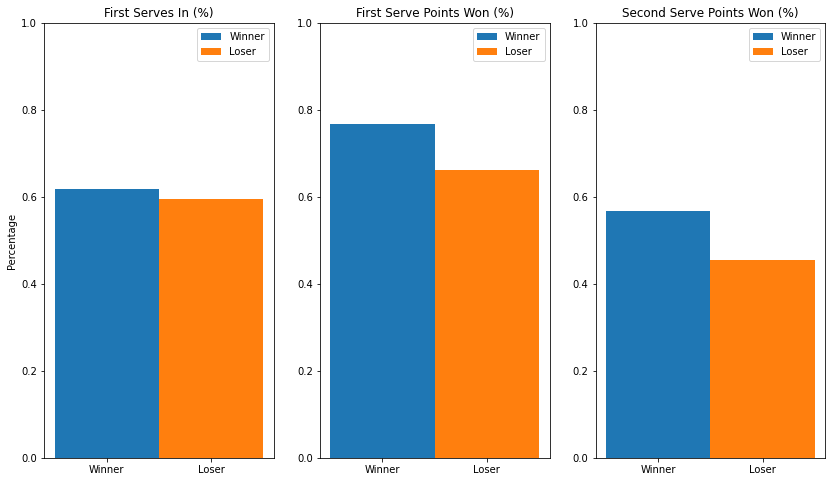

In [51]:
# instantiate plot
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (14,8))
width = 0.35


# plot first serve percentages -- winner vs loser
plot_winner_loser(ax1, [avg_first_serve_in_win, avg_first_serve_in_lose])
ax1.set_ylabel('Percentage')
ax1.set_title('First Serves In (%)')
ax1.set_xticks([0, width])
ax1.set_xticklabels(['Winner', 'Loser'])
ax1.legend()

# plot first serve point percentages -- winner vs loser
plot_winner_loser(ax2, [avg_first_serve_points_win, avg_first_serve_points_lose])
#ax2.set_ylabel('Percentage')
ax2.set_title('First Serve Points Won (%)')
ax2.set_xticks([0, width])
ax2.set_xticklabels(['Winner', 'Loser'])
ax2.legend()

# plot second serve point percentages -- winner vs loser
plot_winner_loser(ax3, [avg_second_serve_points_win, avg_second_serve_points_lose])
ax3.set_title('Second Serve Points Won (%)')
#ax3.set_ylabel('Percentage')
ax3.set_xticks([0, width])
ax3.set_xticklabels(['Winner', 'Loser'])
ax3.legend();


# https://matplotlib.org/3.2.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

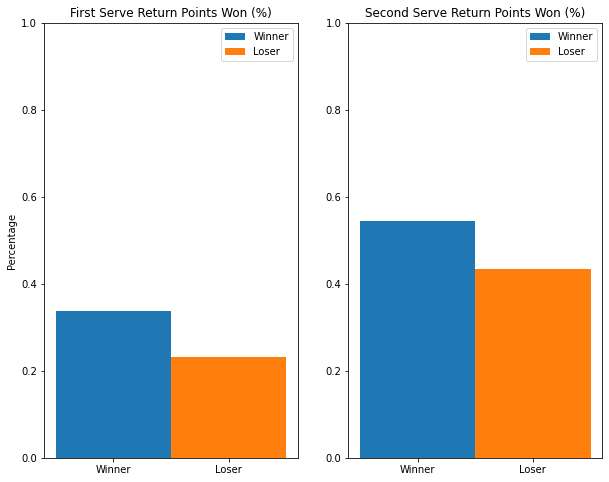

In [52]:
# instantiate plot
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (10,8))
width = 0.35


# plot first serve point percentages -- winner vs loser
plot_winner_loser(ax1, [avg_first_return_points_win, avg_first_return_points_lose])
ax1.set_title('First Serve Return Points Won (%)')
ax1.set_ylabel('Percentage')
ax1.set_xticks([0, width])
ax1.set_xticklabels(['Winner', 'Loser'])
ax1.legend()

# plot second serve point percentages -- winner vs loser
plot_winner_loser(ax2, [avg_second_return_points_win, avg_second_return_points_lose])
ax2.set_title('Second Serve Return Points Won (%)')
#ax2.set_ylabel('Percentage')
ax2.set_xticks([0, width])
ax2.set_xticklabels(['Winner', 'Loser'])
ax2.legend();

---

### Merging data

In [56]:
df = pd.merge(df_scores, df_stats, on = 'match_id')

In [62]:
df.groupby('winner_name')['winner_first_serve_points_won', 'winner_first_serve_points_total'].mean()

/Users/aidandominguez/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,winner_first_serve_points_won,winner_first_serve_points_total
winner_name,,
Adam Pavlasek,59.000000,70.000000
Adrian Bodmer,37.000000,42.000000
Adrian Mannarino,34.794872,48.897436
Adrian Menendez-Maceiras,33.000000,44.125000
Agustin Velotti,22.500000,31.500000
...,...,...
Yusuke Takahashi,22.000000,30.000000
Yuya Kibi,42.000000,60.000000
Zdenek Kolar,42.000000,58.000000


In [63]:
df.shape

(3798, 75)